In [1]:
import numpy as np
from nltk.tokenize import RegexpTokenizer
import gensim
from gensim import corpora, models
from collections import Counter
import scipy.io
import matplotlib.pyplot as plt
from random import *
import random
import scipy.io
from pathlib import Path
from scipy.stats import spearmanr
import plotpatterns as plotpatterns
import helper as helper
import math
# Mann-Whitney U test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import mannwhitneyu
from scipy import stats

# HoweKahana 1999 Dataset

There are 65 subjects in total, each completing 6 sessions of 16 lists.
They add up to a total of 660 trials of free recall.
There are 10.276923076923078 trials on average per person.
With 3.2463361232090664 as the standard deviation.
There are 62 subjects in total, each completing 6 sessions of 16 lists.
They add up to a total of 701 trials of free recall.
There are 11.306451612903226 trials on average per person.
With 2.6248730210604374 as the standard deviation.


/usr/people/qiongz/.conda/envs/myenv/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/people/qiongz/.conda/envs/myenv/lib/python3.5/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


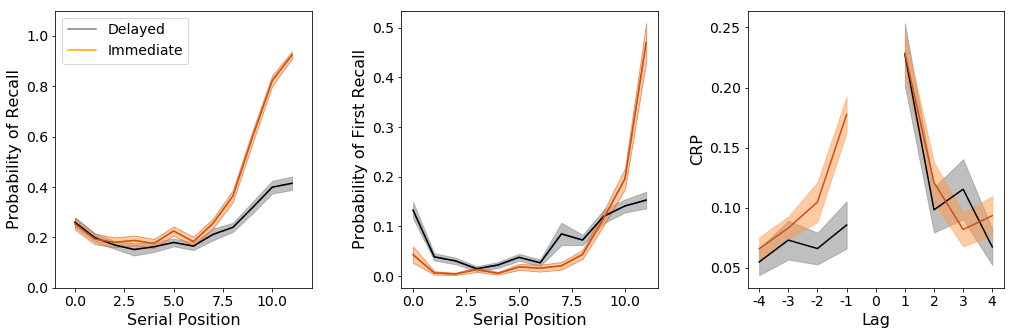

Statistics=1188.000, p=0.020
Different distribution (reject H0)
Ttest_indResult(statistic=1.9515075446572918, pvalue=0.053562618817301566)
Statistics=185.500, p=0.042
Different distribution (reject H0)
Ttest_indResult(statistic=0.0038705285754970986, pvalue=0.9969263048105588)
Statistics=882.500, p=0.000
Different distribution (reject H0)
Ttest_indResult(statistic=-3.7570642402214527, pvalue=0.00027795769947150156)


In [2]:
# load dataset
ll = 12
percent = 80
recall_sp_d, subject_d = helper.extractData_HowaKaha("HowaKaha99/Delay.dat")
spcs_d, pfrs_d, crps_d, accs_d, tces, nums, recalls_sp_d_good, recalls_sp_d_bad = helper.extractTrials_HoweKaha(recall_sp_d,np.unique(subject_d),subject_d,percent,1,ll)
counts, bins = np.histogram(subject_d,[i for i in range(1000)])
counts = [x for x in counts if x>0]
print("There are {} subjects in total, each completing 6 sessions of 16 lists.".format(len(np.unique(subject_d))))
print("They add up to a total of {} trials of free recall.".format(len(recall_sp_d)))
print("There are {} trials on average per person.".format(np.mean(counts)))
print("With {} as the standard deviation.".format(np.std(counts)))


recall_sp_i, subject_i = helper.extractData_HowaKaha("HowaKaha99/Immed.dat")
spcs_i, pfrs_i, crps_i, accs_i, tces, nums, recalls_sp_i_good, recalls_sp_i_bad = helper.extractTrials_HoweKaha(recall_sp_i,np.unique(subject_i),subject_i,percent,1,ll)
counts, bins = np.histogram(subject_i,[i for i in range(1000)])
counts = [x for x in counts if x>0]
print("There are {} subjects in total, each completing 6 sessions of 16 lists.".format(len(np.unique(subject_i))))
print("They add up to a total of {} trials of free recall.".format(len(recall_sp_i)))
print("There are {} trials on average per person.".format(np.mean(counts)))
print("With {} as the standard deviation.".format(np.std(counts)))

spc_d, pfr_d = helper.get_spc_pfr(recall_sp_d,ll)
crp_d,_ = helper.get_crp(recall_sp_d,4,ll,1)
spc_i, pfr_i = helper.get_spc_pfr(recall_sp_i,ll)
crp_i,_ = helper.get_crp(recall_sp_i,4,ll,1)

#plotpatterns.plot_behav(spc_d,pfr_d,crp_d,spc_i,pfr_i,crp_i,ll,'Delayed','Immediate','figure_delay_immed.png')
forward1,forward2,lag1,lag2,contiguity1,contiguity2,primacy1,primacy2 = plotpatterns.plot_behav0(12,spcs_d[0],pfrs_d[0],crps_d[0],spcs_i[0],pfrs_i[0],crps_i[0],'Delayed','Immediate','figure_delay_immed.png')
#forward1,forward2,contiguity1,contiguity2 = helper.obtain_CRPbehav(crps_d[0],crps_i[0])
helper.stats_test(forward1,forward2)
helper.stats_test(primacy1,primacy2)

helper.stats_test(contiguity1,contiguity2)


In [3]:
# non-parametric test, difference of good/bad in -1 is larger in immediate condition
temp1 = [x[3] for i,x in enumerate(crps_d[1])]
temp2 = [x[3] for i,x in enumerate(crps_d[2])]
diff1 = [np.random.choice(temp1, 10000)-np.random.choice(temp2, 10000)]
temp3 = [x[3] for i,x in enumerate(crps_i[1])]
temp4 = [x[3] for i,x in enumerate(crps_i[2])]
diff2 = [np.random.choice(temp3, 10000)-np.random.choice(temp4, 10000)]
stat, p = mannwhitneyu(list(diff1),list(diff2))
print(np.mean(diff1))
print(np.mean(diff2))
print('Statistics=%.3f, p=%.3f' % (stat, p))

# non-parametric test, difference of good/bad in +1 is larger in delay condition
temp1 = [x[5] for i,x in enumerate(crps_d[1])]
temp2 = [x[5] for i,x in enumerate(crps_d[2])]
diff1 = [np.random.choice(temp1, 10000)-np.random.choice(temp2, 10000)]
temp3 = [x[5] for i,x in enumerate(crps_i[1])]
temp4 = [x[5] for i,x in enumerate(crps_i[2])]
diff2 = [np.random.choice(temp3, 10000)-np.random.choice(temp4, 10000)]
stat, p = mannwhitneyu(list(diff1),list(diff2))
print(np.mean(diff1))
print(np.mean(diff2))
print('Statistics=%.3f, p=%.3f' % (stat, p))

0.008415942152618625
0.06450049039711578
Statistics=-840.000, p=0.000
0.12119964667458148
0.03725234495270137
Statistics=-18247.000, p=0.000


/usr/people/qiongz/.conda/envs/myenv/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/people/qiongz/.conda/envs/myenv/lib/python3.5/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


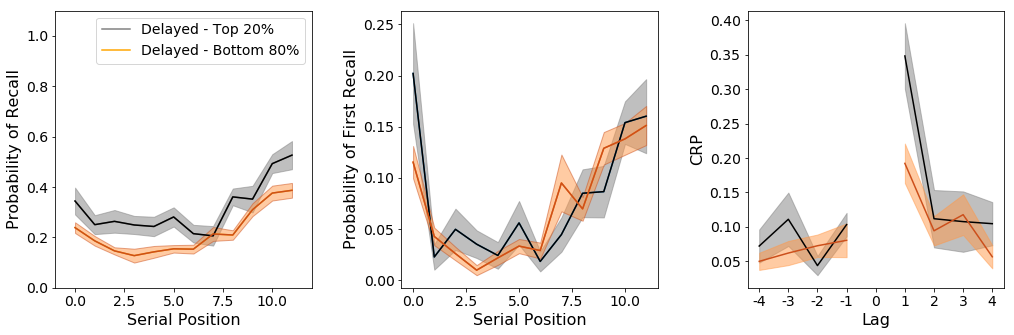

12
41
Statistics=198.500, p=0.159
Same distribution (fail to reject H0)
Ttest_indResult(statistic=1.0291891748317863, pvalue=0.3082472622009589)
Statistics=187.500, p=0.007
Different distribution (reject H0)
Ttest_indResult(statistic=1.386850671378716, pvalue=0.17037495885923248)


In [4]:
spc_d, pfr_d = helper.get_spc_pfr(recalls_sp_d_good,ll)
crp_d,_ = helper.get_crp(recalls_sp_d_good,4,ll,1)
spc_i, pfr_i = helper.get_spc_pfr(recalls_sp_d_bad,ll)
crp_i,_ = helper.get_crp(recalls_sp_d_bad,4,ll,1)
#plotpatterns.plot_behav(spc_d,pfr_d,crp_d,spc_i,pfr_i,crp_i,ll,"Delayed - Top Half", "Delayed - Bottom Half",'figure_delay.png') 

forward1_d,forward2_d,lag1,lag2,contiguity1_d,contiguity2_d,_,_ = plotpatterns.plot_behav0(12,spcs_d[1], pfrs_d[1], crps_d[1], spcs_d[2], pfrs_d[2], crps_d[2], "Delayed - Top 20%", "Delayed - Bottom 80%", "figure_delay.png")
print(len(forward1_d))
print(len(forward2_d))
#helper.stats_test(contiguity1_d,contiguity2_d)
helper.stats_test(forward1_d,forward2_d)
helper.stats_test(lag1,lag2)

/usr/people/qiongz/.conda/envs/myenv/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/people/qiongz/.conda/envs/myenv/lib/python3.5/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


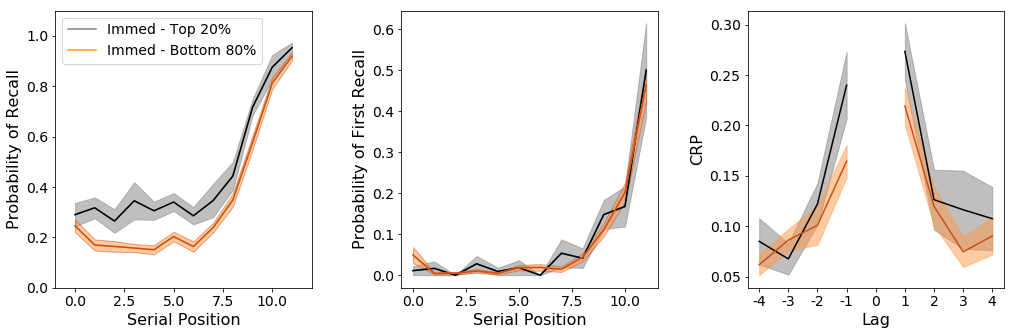

Statistics=144.000, p=0.025
Different distribution (reject H0)
Ttest_indResult(statistic=1.469411176379207, pvalue=0.1473171625003604)
10
48


In [5]:
spc_d, pfr_d = helper.get_spc_pfr(recalls_sp_i_good,ll)
crp_d,_ = helper.get_crp(recalls_sp_i_good,4,ll,1)
spc_i, pfr_i = helper.get_spc_pfr(recalls_sp_i_bad,ll)
crp_i,_ = helper.get_crp(recalls_sp_i_bad,4,ll,1)
#plotpatterns.plot_behav(spc_d,pfr_d,crp_d,spc_i,pfr_i,crp_i,ll,"Immed - Top Half", "Immed - Bottom Half",'figure_immed.png') 

forward1_i,forward2_i,lag1,lag2,contiguity1_i,contiguity2_i,_,_ = plotpatterns.plot_behav0(12,spcs_i[1], pfrs_i[1], crps_i[1], spcs_i[2], pfrs_i[2], crps_i[2], "Immed - Top 20%", "Immed - Bottom 80%",'figure_immed.png')
#forward1,forward2,contiguity1,contiguity2 = helper.obtain_CRPbehav(crps_i[1],crps_i[2])
helper.stats_test(contiguity1_i,contiguity2_i)
#helper.stats_test(forward1_i,forward2_i)
print(len(contiguity1_i))
print(len(contiguity2_i))

# PEERS dataset

In [6]:
# load PEERS data - need to download this dataset first from and change directories in helper.load_data(): http://memory.psych.upenn.edu/Data_Archive
recalls, recalls_sp, listlengths, sessionlengths, subjects, subjs = helper.load_data()
print("PEERS session 1 data loaded")

PEERS session 1 data loaded


In [7]:
# parameter
percent = 90 # percentage used to separate data
spcs,pfrs,crps,accs,tces,nums, recalls_sp_good, recalls_sp_bad,included_subjects, transitions_good, transitions_bad, RT_good, RT_bad, transitions_many, transitions_few= helper.extractTrials(recalls, recalls_sp,subjects,subjs,sessionlengths,percent,2,5)
print("There are {} subjects in total, each completing 6 sessions of 16 lists.".format(len(spcs[0])))
print("They add up to a total of {} trials of free recall.".format(len(spcs[0])*96))
#plotpatterns.plot_behav2(spcs[4], pfrs[4], crps[4], spcs[5], pfrs[5], crps[5], "Top 10%","Bottom 90%", "")
#plotpatterns.plot_behav2(spcs[7], pfrs[7], crps[7], spcs[8], pfrs[8], crps[8], "Top 10%","Bottom 90%", "")

/usr/people/qiongz/.conda/envs/myenv/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/people/qiongz/.conda/envs/myenv/lib/python3.5/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


There are 171 subjects in total, each completing 6 sessions of 16 lists.
They add up to a total of 16416 trials of free recall.


#### Result 1: Better subjects have higher primacy and forward asymmetry

In [8]:
print("There are {} good subjects.".format(len(spcs[1])))
print("In total {} trials.".format(np.sum(nums[1])))
print("Mean performance for good subjects is {}.".format(np.mean(accs[1])/16))
print("There are {} bad subjects.".format(len(spcs[2])))
print("In total {} trials.".format(np.sum(nums[2])))
print("Mean performance for bad subjects is {}.".format(np.mean(accs[2])/16))

There are 17 good subjects.
In total 1632 trials.
Mean performance for good subjects is 0.845358455882353.
There are 154 bad subjects.
In total 14784 trials.
Mean performance for bad subjects is 0.596586681547619.


SpearmanrResult(correlation=0.2499774998594164, pvalue=0.0009757949150140907)
SpearmanrResult(correlation=0.4735738114095088, pvalue=6.081702758308872e-11)


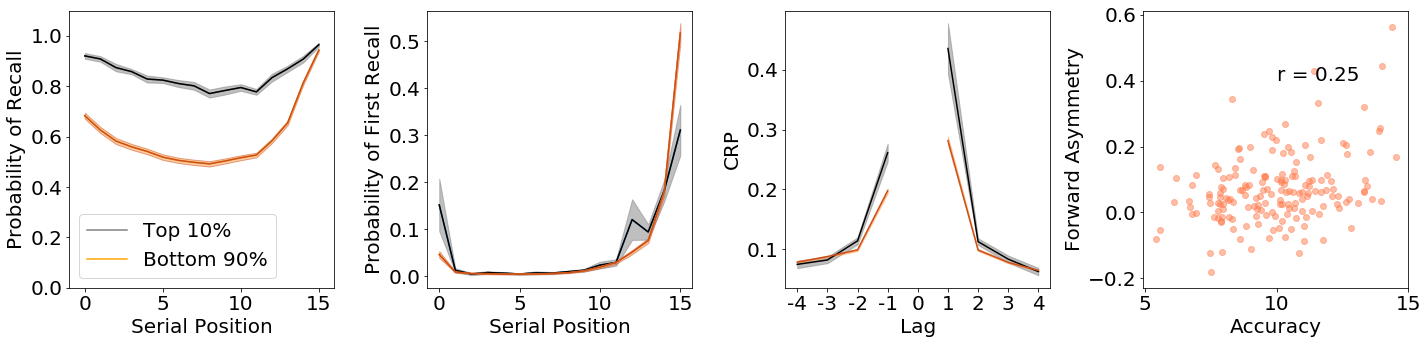

In [9]:
plotpatterns.plot_behav1(16, spcs[1], pfrs[1], crps[1], spcs[2], pfrs[2], crps[2], "Top 10%","Bottom 90%",spcs[0], pfrs[0],crps[0],accs[0], "figure7_PEERS1_2.png")

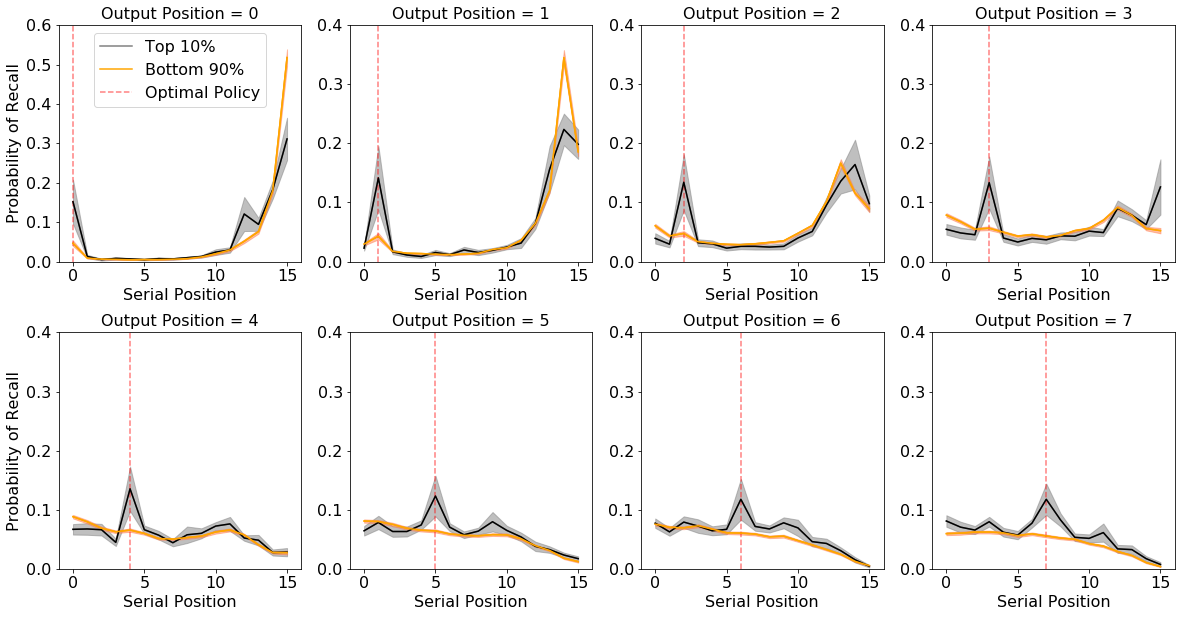

In [10]:
plotpatterns.plot_transitions(transitions_good,transitions_bad,'Top 10%','Bottom 90%','figure7_transitions.png')

#### Result 2: Better subjects have higher forward asymmetry on primacy trials and higher backward transitions in recency trials

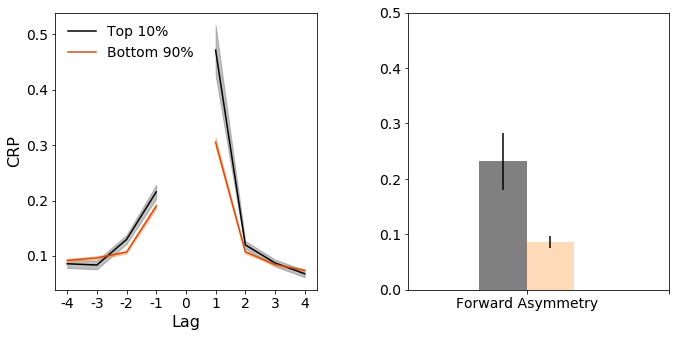

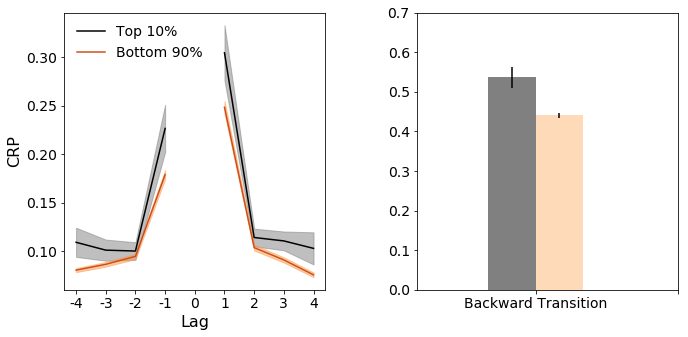

In [11]:
plotpatterns.plot_behav2_forward(spcs[4], pfrs[4], crps[4], spcs[5], pfrs[5], crps[5], "Top 10%","Bottom 90%", "Figure8_top.png")
plotpatterns.plot_behav2_contiguity(spcs[7], pfrs[7], crps[7], spcs[8], pfrs[8], crps[8], "Top 10%","Bottom 90%", "Figure8_bottom.png")